In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [4]:
plane = pd.read_csv('./dataverse_files/plane-data.csv')
plane = plane.dropna()
plane.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998


In [5]:
flight_2008 = pd.read_csv('./dataverse_files/2008.csv')
flight_2007 = pd.read_csv('./dataverse_files/2007.csv')
flight_2006 = pd.read_csv('./dataverse_files/2006.csv')

flight = pd.concat([flight_2006, flight_2007, flight_2008])
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [8]:
flight_plane = flight.join(plane.set_index('tailnum'), on='TailNum')
flight_plane.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0.0,0.0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0.0,0.0,Corporation,AIRBUS,10/04/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0.0,0.0,Corporation,AIRBUS INDUSTRIE,01/25/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0.0,0.0,Corporation,BOEING,09/28/2005,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1990


In [17]:
flight_plane['CRSDepHourOfDay'] = flight_plane['CRSDepTime'] // 100

In [19]:
dom_delay = flight_plane.groupby('DayofMonth').agg({'DepDelay': ['sum', 'mean']})
dow_delay = flight_plane.groupby('DayOfWeek').agg({'DepDelay': ['sum', 'mean']})
hod_delay = flight_plane.groupby('CRSDepHourOfDay').agg({'DepDelay': ['sum', 'mean']})

In [26]:
dom_delay_np = dom_delay.reset_index().to_numpy()
dow_delay_np = dow_delay.reset_index().to_numpy()
hod_delay_np = hod_delay.reset_index().to_numpy()

In [47]:
hod_delay

DepDelay           
                        sum       mean
CRSDepHourOfDay                       
0                  135111.0   6.083341
1                   48845.0   5.420597
2                    8974.0   4.148867
3                   11558.0  14.913548
4                   10082.0   6.231150
5                  179017.0   1.755103
6                 2316904.0   2.013738
7                 3585522.0   3.126237
8                 5266539.0   4.562456
9                 6451571.0   5.955315
10                7689118.0   7.296992
11                8922130.0   8.147737
12               10070998.0   9.665483
13               12307808.0  11.473287
14               13385151.0  12.857690
15               14296919.0  14.087605
16               16549604.0  15.631385
17               19105236.0  17.047090
18               17695760.0  17.810280
19               17601178.0  18.349393
20               12575606.0  19.016290
21                8868417.0  16.118563
22                2468176.0  11.984637
23                1021849.0  10.726047

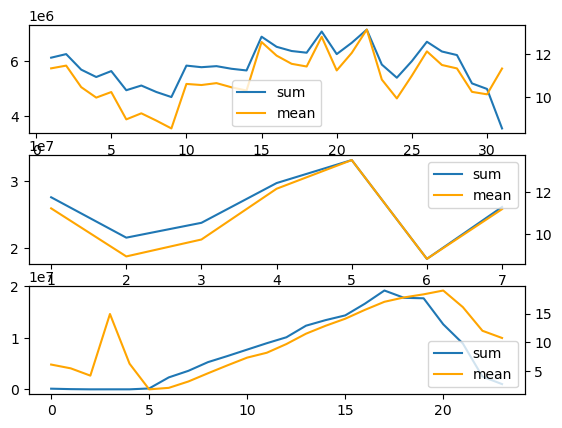

In [43]:
ax1 = plt.subplot(3, 1, 1)
l1, = ax1.plot(dom_delay_np[:,0], dom_delay_np[:,1], label='sum')
ax11 = ax1.twinx()
l11, = ax11.plot(dom_delay_np[:,0], dom_delay_np[:,2], color='orange', label='mean')
plt.legend([l1, l11], ['sum', 'mean'])

ax2 = plt.subplot(3, 1, 2)
l2, = ax2.plot(dow_delay_np[:,0], dow_delay_np[:,1], label='sum')
ax21 = ax2.twinx()
l21, = ax21.plot(dow_delay_np[:,0], dow_delay_np[:,2], color='orange', label='mean')
plt.legend([l2, l21], ['sum', 'mean'])



ax3 = plt.subplot(3, 1, 3)
l3, = ax3.plot(hod_delay_np[:,0], hod_delay_np[:,1], label='sum')
ax31 = ax3.twinx()
l31, = ax31.plot(hod_delay_np[:,0], hod_delay_np[:,2], color='orange', label='mean')
plt.legend([l3, l31], ['sum', 'mean'])



- As shown in the figure, we mainly focus on the mean dep_delay group by time.
- Best time of day is: 5
- Best day of week is: 6
- Best day of month is: 9